In [ ]:
# ----------------------------------------------------------
# Análisis básico de audio submarino (hidrófono electret)
# Autor: Pablo Arenas López
# ----------------------------------------------------------

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.signal as sig

# === 1. Cargar archivo de audio ===
ruta_audio = r"C:\...\nombre.wav"  # Nombre del archivo
y, sr = librosa.load(ruta_audio, sr=None)  # sr=None conserva la tasa original

print(f"Duración: {len(y)/sr:.2f} s  |  Frecuencia de muestreo: {sr} Hz")

Duración: 305.65 s  |  Frecuencia de muestreo: 48000 Hz


In [2]:
# === 1.5 Recorte para igualar duración (5 minutos) ===

duracion_deseada = 5 * 60  # 5 minutos en segundos
muestras_deseadas = int(duracion_deseada * sr)

duracion_actual = len(y) / sr
print(f"Duración original: {duracion_actual:.2f} s")

if len(y) > muestras_deseadas:
    # Corta desde el final hacia atrás para conservar lo más reciente
    y = y[-muestras_deseadas:]
    print("✔ Recorte aplicado (se eliminó el inicio).")
else:
    # Si es más corto, lo deja igual
    print("✔ No se recortó: la grabación es más corta que 5 min.")

print(f"Duración final: {len(y)/sr:.2f} s")


Duración original: 305.65 s
✔ Recorte aplicado (se eliminó el inicio).
Duración final: 300.00 s


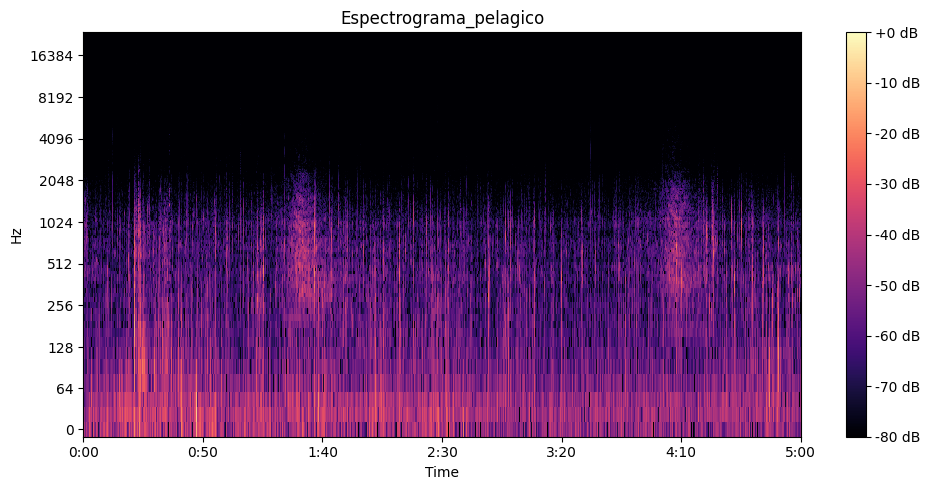

✅ Figura guardada en: C:\Users\pealf\OneDrive\Escritorio\Hidrófono\AudioFiles_Length_Adjusted\Pelágico_3\espectrograma_pelagicoPelagico_3.png


In [ ]:
# === 2. Visualizar el espectrograma ===
import os

# Crea el espectrograma
S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Carpeta donde guardar las figuras
carpeta_figuras = r"C:\...\Figuras_Hidrofono"
os.makedirs(carpeta_figuras, exist_ok=True)

# Genera nombre del archivo de salida con base en el nombre del audio
nombre_figura = "espectrograma_grabación" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
ruta_salida = os.path.join(carpeta_figuras, nombre_figura)

# Visualización y guardado
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma_grabacion")
plt.tight_layout()
plt.savefig(ruta_salida, dpi=300)
plt.show()

print(f"✅ Figura guardada en: {ruta_salida}")


Nivel RMS promedio: -38.83 dB re 1 µPa (relativo)


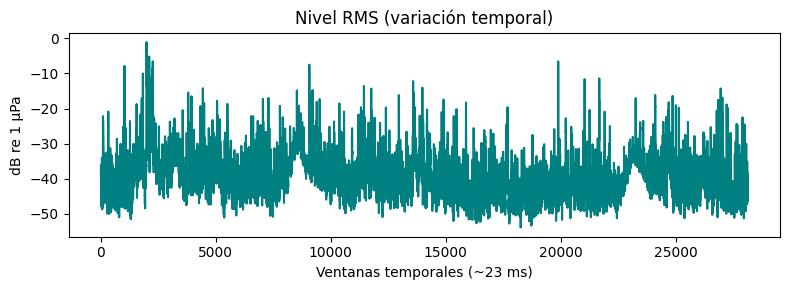

✅ Figura RMS guardada en: C:\Users\pealf\OneDrive\Escritorio\Hidrófono\AudioFiles_Length_Adjusted\Pelágico_3\RMS_Rocoso_Haynes_CayPelagico_3.png


In [ ]:
# === 3. Calcular RMS (nivel medio en dB) ===
import os

rms = librosa.feature.rms(y=y)[0]
rms_db = 20 * np.log10(rms + 1e-6)
print(f"Nivel RMS promedio: {np.mean(rms_db):.2f} dB re 1 µPa (relativo)")

# Carpeta de salida
carpeta_figuras = r"C:\...\Figuras_Hidrofono"
os.makedirs(carpeta_figuras, exist_ok=True)

# Nombre único basado en el archivo de audio
nombre_RMS = "RMS_Nombre_Grabacion" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
ruta_salida_RMS = os.path.join(carpeta_figuras, nombre_RMS)

# Gráfico
plt.figure(figsize=(8, 3))
plt.plot(rms_db, color='teal')
plt.title("Nivel RMS (variación temporal)")
plt.xlabel("Ventanas temporales (~23 ms)")
plt.ylabel("dB re 1 µPa")
plt.tight_layout()
plt.savefig(ruta_salida_RMS, dpi=300)
plt.show()

print(f"✅ Figura RMS guardada en: {ruta_salida_RMS}")


In [5]:
# === 4. Separar por bandas de frecuencia ===
# Rango físico: < 300 Hz (olas, corriente, turbulencia)
# Rango humano: 300–1000 Hz (motores, embarcaciones)
# Rango biológico: > 1000 Hz (peces, invertebrados, clics biológicos)

# --- Ruido físico ---
b_fis, a_fis = sig.butter(4, 300/(sr/2), btype='low')
y_fisico = sig.filtfilt(b_fis, a_fis, y)

# --- Ruido humano ---
b_hum, a_hum = sig.butter(4, [300/(sr/2), 1000/(sr/2)], btype='band')
y_humano = sig.filtfilt(b_hum, a_hum, y)

# --- Ruido biológico ---
b_bio, a_bio = sig.butter(4, 1000/(sr/2), btype='high')
y_biologico = sig.filtfilt(b_bio, a_bio, y)


In [6]:
# === 5. Calcular RMS de cada banda ===
# Se calcula el valor RMS (Root Mean Square) de cada componente de ruido
# Convertido a decibelios (dB) para comparación logarítmica

rms_fisico = 20 * np.log10(np.sqrt(np.mean(y_fisico**2)) + 1e-6)
rms_humano = 20 * np.log10(np.sqrt(np.mean(y_humano**2)) + 1e-6)
rms_biologico = 20 * np.log10(np.sqrt(np.mean(y_biologico**2)) + 1e-6)
rms_total = 20 * np.log10(np.sqrt(np.mean(y**2)) + 1e-6)

print(f"RMS ruido físico (<500Hz): {rms_fisico:.2f} dB")
print(f"RMS ruido humano (500–2000Hz): {rms_humano:.2f} dB")
print(f"RMS ruido biológico (>2000Hz): {rms_biologico:.2f} dB")
print(f"RMS total: {rms_total:.2f} dB")


RMS ruido físico (<500Hz): -32.04 dB
RMS ruido humano (500–2000Hz): -33.85 dB
RMS ruido biológico (>2000Hz): -43.27 dB
RMS total: -29.29 dB


✅ Tabla CSV guardada en: C:\Users\pealf\OneDrive\Escritorio\Hidrófono\AudioFiles_Length_Adjusted\Pelágico_3\RMS_promedios.csv


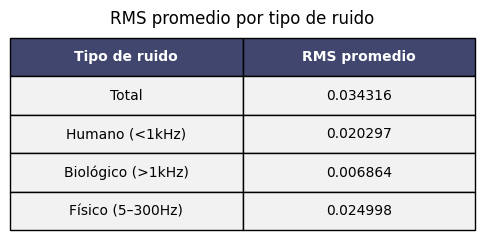

✅ Figura de RMS guardada en: C:\Users\pealf\OneDrive\Escritorio\Hidrófono\AudioFiles_Length_Adjusted\Pelágico_3\RMS_promedios.png


In [7]:
# === 6. Calcular y guardar RMS promedio por tipo de ruido ===
import pandas as pd
from matplotlib.table import Table

# Función RMS
def rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

# Cálculo de RMS para cada tipo de señal
rms_humano = rms(y_humano)
rms_biologico = rms(y_biologico)
rms_fisico = rms(y_fisico)
rms_total = rms(y)

# Crear tabla de resultados
data = {
    "Tipo de ruido": ["Total", "Humano (<1kHz)", "Biológico (>1kHz)", "Físico (5–300Hz)"],
    "RMS promedio": [rms_total, rms_humano, rms_biologico, rms_fisico]
}
df = pd.DataFrame(data)

# === Guardar como CSV ===
ruta_csv = os.path.join(carpeta_figuras, "RMS_promedios.csv")
df.to_csv(ruta_csv, index=False)
print(f"✅ Tabla CSV guardada en: {ruta_csv}")

# === Guardar como figura ===
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

tabla = Table(ax, bbox=[0, 0, 1, 1])
n_rows, n_cols = df.shape
col_labels = list(df.columns)

# Agregar encabezados
for j, label in enumerate(col_labels):
    cell = tabla.add_cell(0, j, width=0.5, height=0.3, text=label, loc='center', facecolor="#40466e")
    cell.get_text().set_color('white')
    cell.get_text().set_weight('bold')

# Agregar filas
for i in range(n_rows):
    for j in range(n_cols):
        texto = f"{df.iloc[i, j]:.6f}" if j == 1 else df.iloc[i, j]
        tabla.add_cell(i+1, j, width=0.5, height=0.3, text=texto, loc='center', facecolor='#f2f2f2')

ax.add_table(tabla)
plt.title("RMS promedio por tipo de ruido", fontsize=12, pad=10)

# Guardar figura
ruta_figura = os.path.join(carpeta_figuras, "RMS_promedios.png")
plt.savefig(ruta_figura, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figura de RMS guardada en: {ruta_figura}")


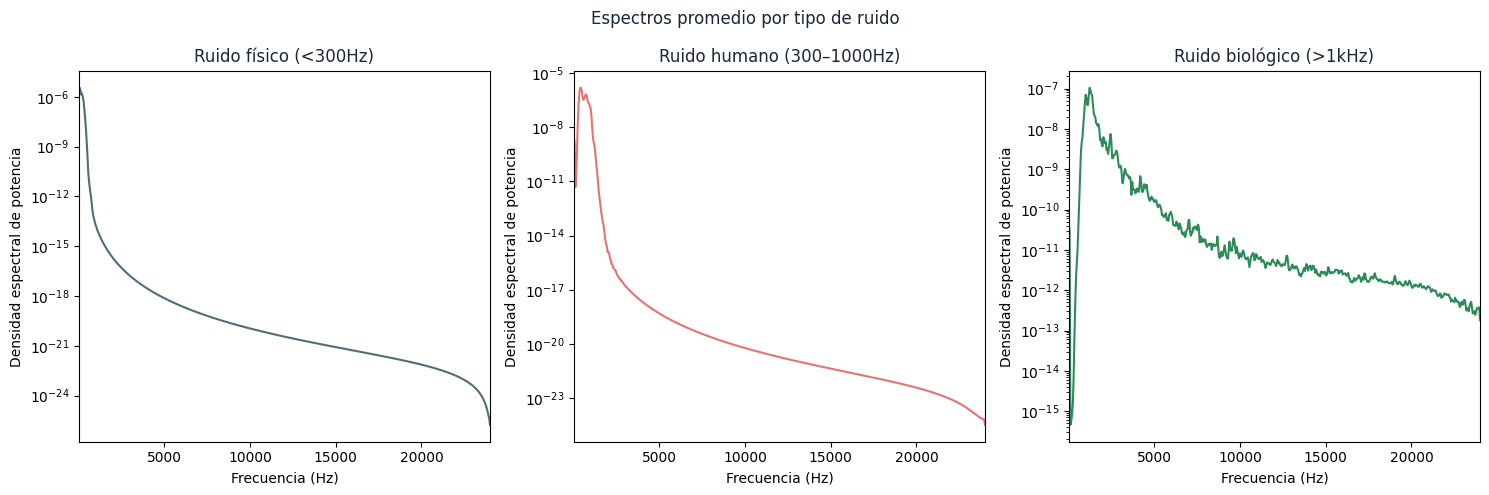

✅ Figura de espectros guardada en: C:\Users\pealf\OneDrive\Escritorio\Hidrófono\AudioFiles_Length_Adjusted\Pelágico_3\EspectroPromedio_Pelagico_3.png


In [ ]:
# === 7. Espectros promedios ===
from scipy import signal as sig
import os
import matplotlib.pyplot as plt

# Paleta de colores
colores = {
    "profundo": "#1B263B",   # azul oscuro para títulos
    "medio": "#2E8B57",      # verde medio (biológico)
    "coral": "#E57373",      # coral (humano)
    "azulprof": "#4F6D7A"    # azul grisáceo (físico)
}

def plot_spectrum(signal, sr, title, color):
    freqs, psd = sig.welch(signal, sr, nperseg=1024)
    plt.semilogy(freqs, psd, color=color)
    plt.title(title, color=colores["profundo"])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Densidad espectral de potencia')
    plt.xlim(10, sr/2)
    plt.tight_layout()

# Carpeta de salida
carpeta_figuras = r"C:\...\Figuras_Hidrofono"
os.makedirs(carpeta_figuras, exist_ok=True)

# Nombre único basado en el archivo de audio
nombre_EP = "EspectroPromedio_" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
ruta_salida_EP = os.path.join(carpeta_figuras, nombre_EP)

# Gráficos lado a lado (3 espectros)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_spectrum(y_fisico, sr, "Ruido físico (<300Hz)", color=colores["azulprof"])

plt.subplot(1, 3, 2)
plot_spectrum(y_humano, sr, "Ruido humano (300–1000Hz)", color=colores["coral"])

plt.subplot(1, 3, 3)
plot_spectrum(y_biologico, sr, "Ruido biológico (>1kHz)", color=colores["medio"])

plt.suptitle("Espectros promedio por tipo de ruido", color=colores["profundo"])
plt.tight_layout()
plt.savefig(ruta_salida_EP, dpi=300)
plt.show()

print(f"✅ Figura de espectros guardada en: {ruta_salida_EP}")


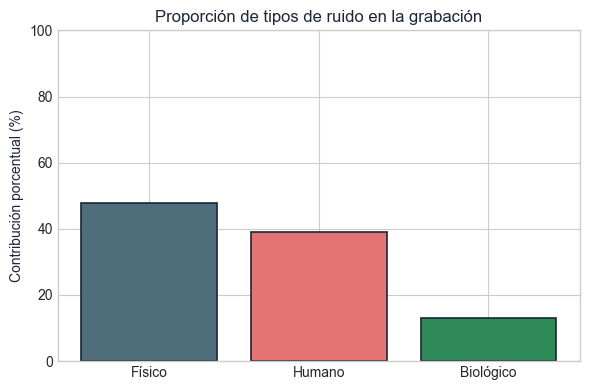

✅ Figura guardada en: C:\Users\pealf\OneDrive\Escritorio\Hidrófono\AudioFiles_Length_Adjusted\Pelágico_3\Porcentaje_Ruido_Pelagico_3_155858.png


In [9]:

# === 8. Proporción de tipos de ruido y gráfico de barras ===

import time 

rms_vals = np.array([rms_fisico, rms_humano, rms_biologico])
if np.all(rms_vals == 0):
    porc_fisico = porc_humano = porc_biologico = 0
else:
    sum_rms = np.sum(rms_vals)
    porc_fisico = 100 * rms_fisico / sum_rms
    porc_humano = 100 * rms_humano / sum_rms
    porc_biologico = 100 * rms_biologico / sum_rms

etiquetas = ['Físico', 'Humano', 'Biológico']
porcentajes = [porc_fisico, porc_humano, porc_biologico]
colores_barras = [colores["azulprof"], colores["coral"], colores["medio"]]

# Estilo claro
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(etiquetas, porcentajes, color=colores_barras, edgecolor=colores["profundo"], linewidth=1.2)
    plt.ylabel('Contribución porcentual (%)', color=colores["profundo"])
    plt.title('Proporción de tipos de ruido en la grabación', color=colores["profundo"])
    plt.ylim(0, 100)
    plt.tight_layout()

    # Guardar con timestamp
    timestamp = time.strftime("%H%M%S")
    nombre_figura = f"Porcentaje_Ruido_{os.path.splitext(os.path.basename(ruta_audio))[0]}_{timestamp}.png"
    plt.savefig(os.path.join(carpeta_figuras, nombre_figura), dpi=300)
    plt.show()

print(f"✅ Figura guardada en: {os.path.join(carpeta_figuras, nombre_figura)}")


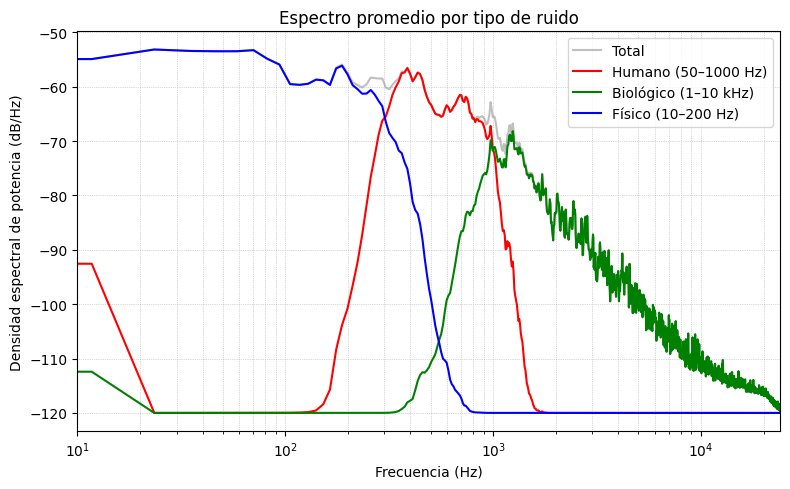

In [10]:
# === 9. Análisis espectral comparativo ===
from scipy.signal import welch

plt.figure(figsize=(8, 5))

# Calcular la densidad espectral de potencia (PSD) para cada banda
freqs_total, psd_total = welch(y, sr, nperseg=4096)
freqs_hum, psd_hum = welch(y_humano, sr, nperseg=4096)
freqs_bio, psd_bio = welch(y_biologico, sr, nperseg=4096)
freqs_fis, psd_fis = welch(y_fisico, sr, nperseg=4096)

# Convierte a dB (añadiendo un mínimo para evitar log(0))
plt.semilogx(freqs_total, 10 * np.log10(psd_total + 1e-12), color='gray', alpha=0.5, label='Total')
plt.semilogx(freqs_hum, 10 * np.log10(psd_hum + 1e-12), color='red', label='Humano (50–1000 Hz)')
plt.semilogx(freqs_bio, 10 * np.log10(psd_bio + 1e-12), color='green', label='Biológico (1–10 kHz)')
plt.semilogx(freqs_fis, 10 * np.log10(psd_fis + 1e-12), color='blue', label='Físico (10–200 Hz)')

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (dB/Hz)")
plt.title("Espectro promedio por tipo de ruido")
plt.xlim(10, sr / 2)
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()

# Guarda el espectro comparativo
nombre_figura = "EspectroComparativo_" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
plt.savefig(os.path.join(carpeta_figuras, nombre_figura), dpi=300)
plt.show()
